Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


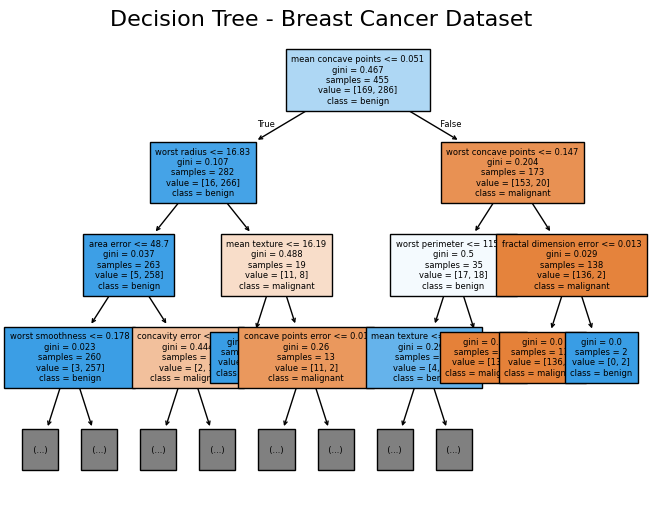


Important Decision Rules (Top 3 Levels):

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- concavity error <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- concavity error >  0.02
|   |   |   |   |--- class: 1
|   |--- worst radius >  16.83
|   |   |--- mean texture <= 16.19
|   |   |   |--- class: 1
|   |   |--- mean texture >  16.19
|   |   |   |--- concave points error <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- concave points error >  0.01
|   |   |   |   |--- class: 1
|--- mean concave points >  0.05
|   |--- worst concave points <= 0.15
|   |   |--- worst perimeter <= 115.25
|   |   |   |--- mean texture <= 21.06
|   |   |   |   |--- class: 1
|   |   |   |--- mean texture >  21.06
|   |   |   |   |--- clas

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict a new sample
new_sample = np.array([X_test[0]])
prediction = clf.predict(new_sample)
prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")

# Plotting the decision tree with better readability
plt.figure(figsize=(8, 6))  # Increase size
plot_tree(
    clf,
    filled=True,
    feature_names=data.feature_names,
    class_names=data.target_names,
    max_depth=3,      # Show only top 3 levels
    fontsize=6       # Larger font
)
plt.title("Decision Tree - Breast Cancer Dataset", fontsize=16)
plt.show()

# Print decision rules as text for top 3 levels
rules_text = export_text(clf, feature_names=list(data.feature_names), max_depth=3)
print("\nImportant Decision Rules (Top 3 Levels):\n")
print(rules_text)
